<a href="https://colab.research.google.com/github/yeabwang/malaria-diagnosis/blob/main/Malaria_diagnosis_version_generalized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# The goal here is to test our trained model with another dataset

# https://www.kaggle.com/datasets/rajsahu2004/lacuna-malaria-detection-dataset

In [ ]:
from google.colab import files
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import load_model

In [ ]:
# Download the dataset

files.upload()
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')
!chmod 600 /root/.kaggle/kaggle.json

!pip install kaggle --upgrade
!pip install --upgrade pip

!kaggle datasets download -d rajsahu2004/lacuna-malaria-detection-dataset
!unzip lacuna-malaria-detection-dataset.zip -d /content/malaria_dataset

In [ ]:
# Load dataset
dataset_dir = '/content/malaria_dataset/images'
image_files = [os.path.join(dataset_dir, f) for f in os.listdir(dataset_dir) if f.endswith('.jpg') or f.endswith('.png')]

In [ ]:
# Shuffle the images and take only the the images from 250 to 500 (random)
random.shuffle(image_files)
image_files = image_files[250:500]

In [ ]:
# Loading and pre processing (resize and normalizing it)
def load_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])
    image = tf.cast(image, tf.float32) / 255.0
    return image

images = np.array([load_image(img_path).numpy() for img_path in image_files])

In [ ]:
# Defining the labeler
def labeler(x):
    if x < 0.5:
        return "Positive"
    else:
        return "Negative"

In [ ]:
# Load the model
model = load_model('/content/drive/MyDrive/Malaria_Model/Malaria_prediction_version_1.keras')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,522,372 (169.84 MB)

 Trainable params: 22,261,185 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,261,187 (84.92 MB)

In [ ]:
# Make predictions on the loaded images
predictions = model.predict(images)

8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step


Pridiction rule, if its <0.5 - Its positive. If its >0.5 - Its Negative 


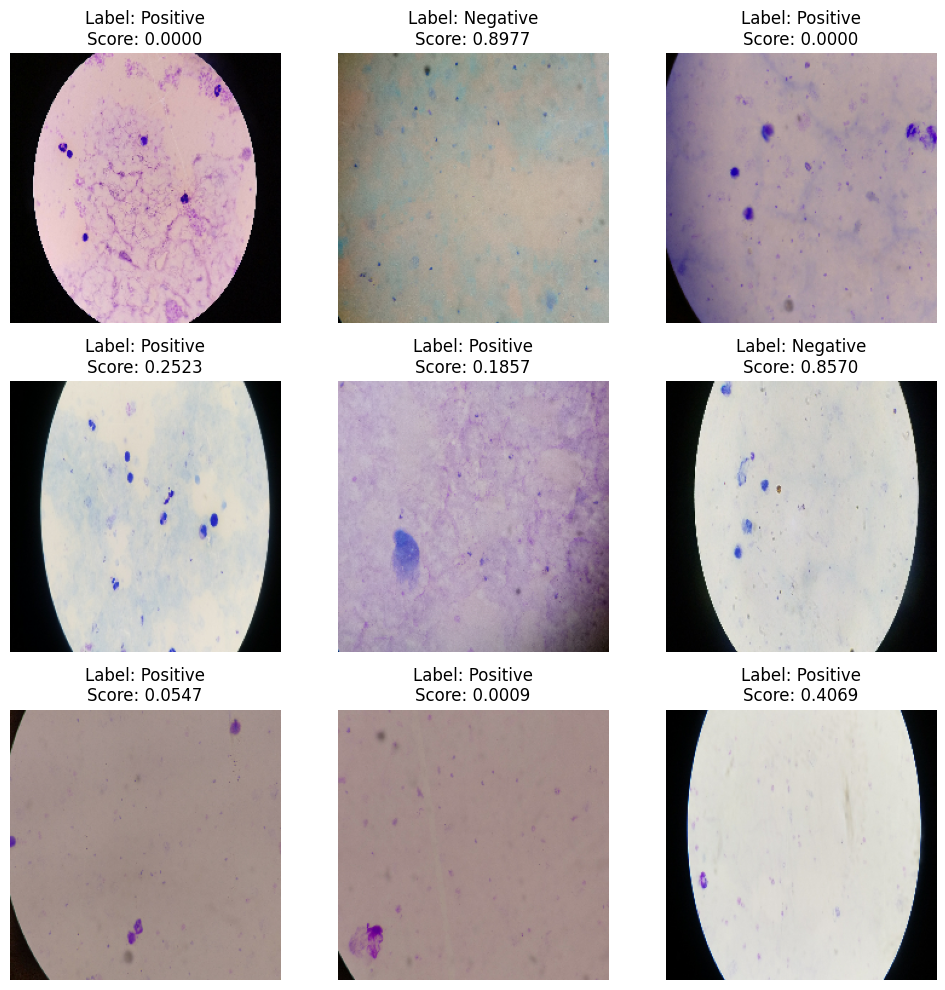

In [ ]:
print("Pridiction rule, if its <0.5 - Its positive. If its >0.5 - Its Negative ")

# Plot the first few images with predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    predicted_label = labeler(predictions[i][0])  # Get the label using the labeler function
    plt.title(f"Label: {predicted_label}\nScore: {predictions[i][0]:.4f}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
for i in range(20):
    label = 'Positive' if predictions[i][0] < 0.5 else 'Negative'
    print(f"Image {i+1}: Predicted label: {label}, Score: {predictions[i][0]:.4f}")

Image 1: Predicted label: Positive, Score: 0.0000
Image 2: Predicted label: Negative, Score: 0.8977
Image 3: Predicted label: Positive, Score: 0.0000
Image 4: Predicted label: Positive, Score: 0.2523
Image 5: Predicted label: Positive, Score: 0.1857
Image 6: Predicted label: Negative, Score: 0.8570
Image 7: Predicted label: Positive, Score: 0.0547
Image 8: Predicted label: Positive, Score: 0.0009
Image 9: Predicted label: Positive, Score: 0.4069
Image 10: Predicted label: Positive, Score: 0.1500
Image 11: Predicted label: Positive, Score: 0.0592
Image 12: Predicted label: Positive, Score: 0.1236
Image 13: Predicted label: Positive, Score: 0.0007
Image 14: Predicted label: Positive, Score: 0.0001
Image 15: Predicted label: Positive, Score: 0.0123
Image 16: Predicted label: Positive, Score: 0.0101
Image 17: Predicted label: Positive, Score: 0.4082
Image 18: Predicted label: Positive, Score: 0.0039
Image 19: Predicted label: Positive, Score: 0.0000
Image 20: Predicted label: Negative, Sco